In [1]:
!pip install natsort
!pip install h5py

  Using cached natsort-8.1.0-py3-none-any.whl (37 kB)


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

import skimage
from scipy.stats import rice

In [127]:
img = np.array(h5py.File('data/1.mat')['cjdata']['image'][:,:]).astype('float64')
img *= 255.0/img.max()   

/home/ashwani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


In [128]:
# Parameters of Rician noise
v = 5
s = 3
N = 512*512 # how many samples

noise = np.random.normal(scale=s, size=(N, 2)) + [[v,0]]
noise = np.linalg.norm(noise, axis=1)
imgnoised = img + noise.reshape(img.shape)
imgnoised *= 255.0/imgnoised.max()   

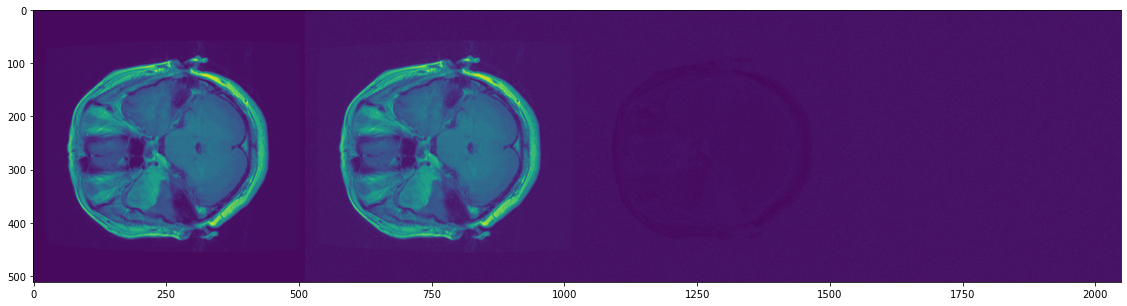

In [150]:
plt.figure(figsize = (20,5))
plt.imshow(np.hstack((img, imgnoised, imgnoised-img, noise.reshape(512,512))))

In [154]:
## rayleigh noise

raynoise = np.random.rayleigh(8, 512*512)
raynoise = raynoise.reshape(512,512)
raynoisy = img + raynoise.reshape(img.shape)
raynoisy *= 255.0/raynoisy.max()   

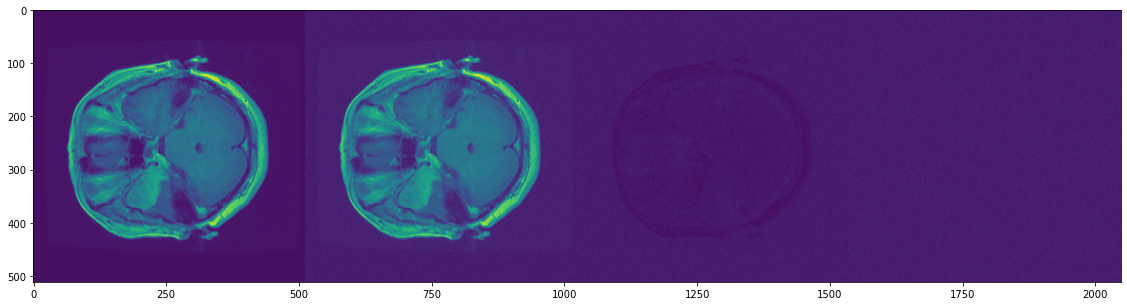

In [155]:
plt.figure(figsize = (20,5))
plt.imshow(np.hstack((img, raynoisy, raynoisy-img, raynoise.reshape(512,512))))

In [112]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise

In [174]:
denoisedtv = denoise_tv_chambolle(imgnoised, weight=0.5)
denoisedbi = denoise_bilateral(imgnoised, sigma_color=0.5, sigma_spatial=15)

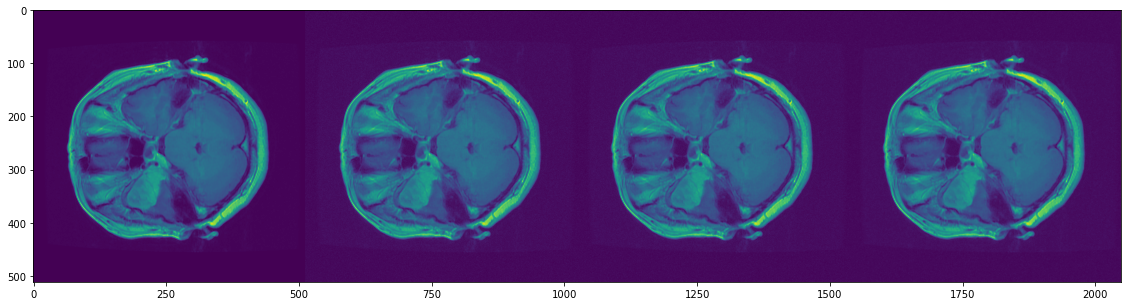

In [175]:
plt.figure(figsize = (20,5))
plt.imshow(np.hstack((img, imgnoised, denoisedbi, denoisedtv)))

In [170]:
skimage.metrics.peak_signal_noise_ratio(img, imgnoised, data_range = 255)

33.25718953137099

In [168]:
skimage.metrics.peak_signal_noise_ratio(img, denoisedbi, data_range = 255)

33.25763949252768

In [176]:
skimage.metrics.peak_signal_noise_ratio(img, denoisedtv, data_range = 255)

33.65398777715351

In [179]:
skimage.metrics.peak_signal_noise_ratio(img, imgnoised, data_range = 255)

33.25718953137099

In [178]:
skimage.metrics.peak_signal_noise_ratio(img, denoisedbi, data_range = 255)

33.290418079302796

In [177]:
skimage.metrics.peak_signal_noise_ratio(img, denoisedtv, data_range = 255)

33.65398777715351

In [126]:
np.max(denoisedtv)

3406.207579388793

In [ ]:
# Denoising of computed tomography using bilateral median based autoencoder network
# Denoising of magnetic resonance imaging using Bayes shrinkage based fused wavelet transform and autoencoder based deep learning approach

